In [1]:
# pip install alpha_vantage

     |████████████████████████████████| 1.2 MB 7.8 MB/s eta 0:00:01     |████████████████████████▉       | 901 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 8.6 MB/s eta 0:00:01
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-py3-none-any.whl size=25704 sha256=5e5c9b18c0dfdfaf32d93f58795541d304b78042acb80d46a03b8ffc9b017042
  Stored in directory: /root/.cache/pip/wheels/ee/38/2e/306b4a5a2d645520be01077accdd067b9e419006083038ef7e
Successfully built alpha-vantage
Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install pandas matplotlib 

     |████████████████████████████████| 10.5 MB 323 kB/s eta 0:00:01.7 MB/s eta 0:00:02
     |████████████████████████████████| 11.6 MB 12.4 MB/s eta 0:00:01   |███████████████████████████▌    | 9.9 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 11.9 MB/s eta 0:00:01    |███████████████████▎            | 8.7 MB 11.8 MB/s eta 0:00:01     |███████████████████████▏        | 10.5 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 5.1 MB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 10.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
# pip install pymongo

     |████████████████████████████████| 511 kB 4.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [119]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
import pyspark
import pandas as pd
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

## Times series
- Récuperations des données des entreprises

In [5]:
API_KEY = "BTZ85NRZ5M873SGG"

In [176]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
MSFT, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
# We can describe it
MSFT

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-09-08 20:00:00,202.88,203.00,202.88,203.00,775.0
2020-09-08 19:59:00,202.90,202.90,202.50,202.50,1436.0
2020-09-08 19:58:00,202.90,202.90,202.90,202.90,908.0
2020-09-08 19:57:00,202.86,203.00,202.76,203.00,1058.0
2020-09-08 19:56:00,203.10,203.10,203.00,203.00,4661.0
...,...,...,...,...,...
2020-08-26 04:09:00,217.00,217.00,217.00,217.00,294.0
2020-08-26 04:04:00,217.38,217.38,217.38,217.38,157.0
2020-08-26 04:03:00,217.34,217.35,217.34,217.35,364.0


# Convert and save to csv

In [177]:
MSFT= MSFT.reset_index()

In [178]:
MSFT.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-09-08 20:00:00,202.88,203.0,202.88,203.0,775.0
1,2020-09-08 19:59:00,202.90,202.9,202.50,202.5,1436.0
2,2020-09-08 19:58:00,202.90,202.9,202.90,202.9,908.0
3,2020-09-08 19:57:00,202.86,203.0,202.76,203.0,1058.0
4,2020-09-08 19:56:00,203.10,203.1,203.00,203.0,4661.0


In [179]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
TOT, meta_data = ts.get_intraday(symbol='TOT',interval='1min', outputsize='full')
# We can describe it

In [180]:
TOT = TOT.reset_index()

In [181]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
TSLA, meta_data = ts.get_intraday(symbol='TSLA',interval='1min', outputsize='full')
# We can describe it

In [182]:
TSLA = TSLA.reset_index()

In [183]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
IBM, meta_data = ts.get_intraday(symbol='IBM',interval='1min', outputsize='full')
# We can describe it

In [184]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
IBM, meta_data = ts.get_intraday(symbol='IBM',interval='1min', outputsize='full')
# We can describe it

In [185]:
IBM= IBM.reset_index()

In [186]:
IBM.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-09-08 18:24:00,120.58,120.58,120.58,120.58,235.0
1,2020-09-08 18:21:00,120.86,120.86,120.86,120.86,250.0
2,2020-09-08 18:19:00,120.86,120.86,120.86,120.86,200.0
3,2020-09-08 18:09:00,120.86,120.86,120.86,120.86,175.0
4,2020-09-08 17:23:00,121.35,121.35,121.35,121.35,108.0


## Rename columns

In [216]:
MSFT = MSFT.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"})

In [217]:
TSLA = TSLA.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"})

In [218]:
TOT = TOT.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"})

In [219]:
IBM = IBM.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"})

In [220]:
IBM.head()

,date,open,high,low,close,volume
0,2020-09-08 18:24:00,120.58,120.58,120.58,120.58,235.0
1,2020-09-08 18:21:00,120.86,120.86,120.86,120.86,250.0
2,2020-09-08 18:19:00,120.86,120.86,120.86,120.86,200.0
3,2020-09-08 18:09:00,120.86,120.86,120.86,120.86,175.0
4,2020-09-08 17:23:00,121.35,121.35,121.35,121.35,108.0


In [221]:
pd.read_csv('ibm.csv')

,date,open,high,low,close,volume
0,2020-09-08 18:24:00,120.58,120.58,120.58,120.58,235.0
1,2020-09-08 18:21:00,120.86,120.86,120.86,120.86,250.0
2,2020-09-08 18:19:00,120.86,120.86,120.86,120.86,200.0
3,2020-09-08 18:09:00,120.86,120.86,120.86,120.86,175.0
4,2020-09-08 17:23:00,121.35,121.35,121.35,121.35,108.0
...,...,...,...,...,...,...
3795,2020-08-26 07:11:00,124.37,124.37,124.37,124.37,206.0
3796,2020-08-26 07:02:00,124.41,124.41,124.41,124.41,173.0
3797,2020-08-26 06:58:00,124.41,124.41,124.41,124.41,205.0
3798,2020-08-26 06:53:00,124.40,124.40,124.40,124.40,206.0


In [195]:
# df_tot = TOT.to_json('TOT.json', orient="records")

In [196]:
# df_msft = MSFT.to_json('MSFT.json', orient="records")

In [197]:
# df_imb = IBM.to_json('IBM.json', orient="records")

In [222]:
# df1 = IBM.to_csv('ibm.csv', encoding='utf-8',index=False)

## Save to workspace

In [223]:
df2 = TSLA.to_csv('tsla.csv', encoding='utf-8', index=False)

In [224]:
pd.read_csv('tsla.csv')

,date,open,high,low,close,volume
0,2020-09-08 20:00:00,323.91,324.40,323.50,324.1500,21010.0
1,2020-09-08 19:59:00,324.36,324.60,323.60,323.8999,20221.0
2,2020-09-08 19:58:00,324.67,324.95,324.30,324.5000,6984.0
3,2020-09-08 19:57:00,325.20,325.50,324.28,324.3100,10538.0
4,2020-09-08 19:56:00,325.28,325.75,325.00,325.7500,14457.0
...,...,...,...,...,...,...
7655,2020-08-26 04:56:00,2051.76,2051.76,2051.76,2051.7600,376.0
7656,2020-08-26 04:54:00,2051.76,2051.76,2051.76,2051.7600,188.0
7657,2020-08-26 04:06:00,2040.11,2040.11,2040.11,2040.1100,637.0
7658,2020-08-26 04:05:00,2045.00,2045.00,2045.00,2045.0000,488.0


In [229]:
df2 = TOT.to_csv('tot.csv', encoding='utf-8', index=False)

In [230]:
pd.read_csv('tot.csv')

,date,open,high,low,close,volume
0,2020-09-08 18:40:00,38.570,38.570,38.57,38.570,100.0
1,2020-09-08 16:01:00,38.210,38.210,38.01,38.010,8745.0
2,2020-09-08 16:00:00,38.110,38.110,38.01,38.010,55699.0
3,2020-09-08 15:59:00,38.085,38.120,38.08,38.120,28198.0
4,2020-09-08 15:58:00,38.100,38.115,38.08,38.085,19793.0
...,...,...,...,...,...,...
3700,2020-08-26 08:17:00,39.390,39.390,39.39,39.390,100.0
3701,2020-08-26 08:13:00,39.390,39.390,39.39,39.390,100.0
3702,2020-08-26 08:01:00,39.390,39.390,39.39,39.390,900.0
3703,2020-08-26 04:15:00,39.400,39.400,39.40,39.400,1713.0


In [231]:
df3 = MSFT.to_csv('msft.csv', encoding='utf-8', index=False)

In [232]:
pd.read_csv('msft.csv')

,date,open,high,low,close,volume
0,2020-09-08 20:00:00,202.88,203.00,202.88,203.00,775.0
1,2020-09-08 19:59:00,202.90,202.90,202.50,202.50,1436.0
2,2020-09-08 19:58:00,202.90,202.90,202.90,202.90,908.0
3,2020-09-08 19:57:00,202.86,203.00,202.76,203.00,1058.0
4,2020-09-08 19:56:00,203.10,203.10,203.00,203.00,4661.0
...,...,...,...,...,...,...
6604,2020-08-26 04:09:00,217.00,217.00,217.00,217.00,294.0
6605,2020-08-26 04:04:00,217.38,217.38,217.38,217.38,157.0
6606,2020-08-26 04:03:00,217.34,217.35,217.34,217.35,364.0
6607,2020-08-26 04:02:00,217.31,217.31,217.31,217.31,301.0


In [210]:
# One way of loading additional packages to spark
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.mongodb.spark:mongo-spark-connector_2.11:2.2.0 pyspark-shell'

In [211]:
liste_compagny = ["TOT", "TSLA", "MSFT", "IBM"]

In [214]:
spark = pyspark.sql.SparkSession.builder\
    .appName('test-mongo')\
    .config("spark.mongodb.input.uri", "mongodb://mongo/trading.IBM") \
    .config("spark.mongodb.output.uri", "mongodb://mongo/trading.IBM") \
    .getOrCreate()

spark.read \
.format("com.mongodb.spark.sql.DefaultSource") \
.load() \
.show()

+--------------------+-------+-------------------+-------+------+-------+--------+
|                 _id|  close|               date|   high|   low|   open|  volume|
+--------------------+-------+-------------------+-------+------+-------+--------+
|[5f59027923fa1d65...| 120.58|2020-09-08 18:24:00| 120.58|120.58| 120.58|   235.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:21:00| 120.86|120.86| 120.86|   250.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:19:00| 120.86|120.86| 120.86|   200.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:09:00| 120.86|120.86| 120.86|   175.0|
|[5f59027923fa1d65...| 121.35|2020-09-08 17:23:00| 121.35|121.35| 121.35|   108.0|
|[5f59027923fa1d65...|  121.5|2020-09-08 17:22:00|  121.5| 121.5|  121.5|   219.0|
|[5f59027923fa1d65...|  121.7|2020-09-08 17:21:00|  121.7| 121.7|  121.7|   400.0|
|[5f59027923fa1d65...| 121.55|2020-09-08 17:11:00| 121.55|121.55| 121.55|   150.0|
|[5f59027923fa1d65...|  121.5|2020-09-08 17:08:00|  121.5| 121.5|  121.5|   150.0|
|[5f

In [215]:
for i in range(len(liste_compagny)):
    spark = pyspark.sql.SparkSession.builder\
        .appName('test-mongo')\
        .config("spark.mongodb.input.uri", f"mongodb://mongo/trading.{liste_compagny[i]}") \
        .config("spark.mongodb.output.uri", f"mongodb://mongo/trading.{liste_compagny[i]}") \
        .getOrCreate()
    print(liste_compagny[i])
    spark.read \
    .format("com.mongodb.spark.sql.DefaultSource") \
    .load() \
    .show()

TOT
++
||
++
++

TSLA
+--------+----------+--------+----------+---------+--------------------+
|       1|         2|       3|         4|        5|                 _id|
+--------+----------+--------+----------+---------+--------------------+
|[390.86]|   [392.0]|[390.81]|   [391.5]|[27944.0]|[5f5902ba23fa1d65...|
|[391.01]|  [391.18]|[390.95]|  [390.95]|[15466.0]|[5f5902ba23fa1d65...|
|[390.61]|  [391.24]|[390.57]|  [391.24]|[15205.0]|[5f5902ba23fa1d65...|
| [390.5]|  [390.65]|[390.43]|  [390.61]| [7372.0]|[5f5902ba23fa1d65...|
| [390.9]|   [391.2]|[390.76]|   [391.0]|[12900.0]|[5f5902ba23fa1d65...|
|[390.91]|  [390.91]|[390.32]|   [390.5]| [6548.0]|[5f5902ba23fa1d65...|
|[390.01]|  [390.41]| [390.0]|  [390.41]|[11662.0]|[5f5902ba23fa1d65...|
|[390.58]|   [391.0]|[390.58]|  [390.95]|[10660.0]|[5f5902ba23fa1d65...|
| [391.0]|   [391.0]| [390.0]| [390.175]| [8087.0]|[5f5902ba23fa1d65...|
|[391.45]|  [391.45]| [391.0]|   [391.0]| [6550.0]|[5f5902ba23fa1d65...|
|[391.56]|  [391.75]| [391.0]

+--------------------+-------+-------------------+-------+------+-------+--------+
|                 _id|  close|               date|   high|   low|   open|  volume|
+--------------------+-------+-------------------+-------+------+-------+--------+
|[5f59027923fa1d65...| 120.58|2020-09-08 18:24:00| 120.58|120.58| 120.58|   235.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:21:00| 120.86|120.86| 120.86|   250.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:19:00| 120.86|120.86| 120.86|   200.0|
|[5f59027923fa1d65...| 120.86|2020-09-08 18:09:00| 120.86|120.86| 120.86|   175.0|
|[5f59027923fa1d65...| 121.35|2020-09-08 17:23:00| 121.35|121.35| 121.35|   108.0|
|[5f59027923fa1d65...|  121.5|2020-09-08 17:22:00|  121.5| 121.5|  121.5|   219.0|
|[5f59027923fa1d65...|  121.7|2020-09-08 17:21:00|  121.7| 121.7|  121.7|   400.0|
|[5f59027923fa1d65...| 121.55|2020-09-08 17:11:00| 121.55|121.55| 121.55|   150.0|
|[5f59027923fa1d65...|  121.5|2020-09-08 17:08:00|  121.5| 121.5|  121.5|   150.0|
|[5f

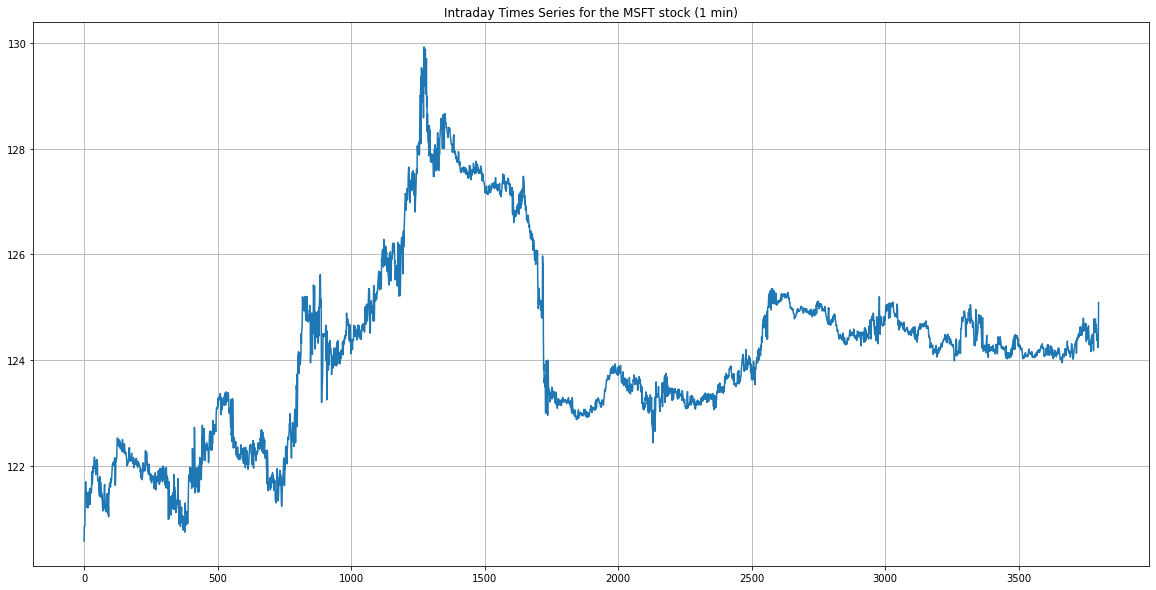

0       120.58
1       120.86
2       120.86
3       120.86
4       121.35
         ...  
3795    124.40
3796    124.41
3797    124.24
3798    124.41
3799    125.09
Name: close, Length: 3800, dtype: float64


In [204]:
from pyspark.sql import SparkSession
import pyspark
import os

# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.mongodb.spark:mongo-spark-connector_2.12:3.0.0 pyspark-shell'
 
def get_data(symbol):
    spark = pyspark.sql.SparkSession.builder\
        .appName('test-mongo')\
        .config("spark.mongodb.input.uri", "mongodb://my-mongo/trading."+symbol) \
        .config("spark.mongodb.output.uri", "mongodb://my-mongo/trading."+symbol ) \
        .getOrCreate()
    
    sc = spark.sparkContext
    rdd = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()
    rdd.show()
    df = rdd.select("*").toPandas()
    df['close'].plot()
    plt.title('Intraday Times Series for the MSFT stock (1 min)')
    plt.grid()
    plt.show()
    print(df['close'])
 
if __name__ == "__main__":
    get_data("IBM")    